#### Open CV란
- 파이썬 이미지 처리 모듈
    - PILLOW: 기본모듈,단순함, 필요하면이미지를 array로 변환해야함
    - openCV: 강의내용 참조
    - skimg: 흑백2채널을 컬러3채널로 변하는등 데이터분석에 필요한 이미지 전처리에 해당하는 작업이 많음
- 위키정의
    - OpenCV(Open Source Computer Vision)은 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리이다. 원래는 인텔이 개발하였다. 실시간 이미지 프로세싱에 중점을 둔 라이브러리이다. 인텔 CPU에서 사용되는 경우 속도의 향상을 볼 수 있는 IPP(Intel Performance Primitives)를 지원한다. 이 라이브러리는 윈도우, 리눅스 등에서 사용 가능한 크로스 플랫폼이며 오픈소스 BSD 허가서 하에서 무료로 사용할 수 있다. OpenCV는 TensorFlow, Torch / PyTorch 및 Caffe의 딥러닝 프레임워크를 지원한다.
    - OpenCV는 이미지를 읽을때 배열구조로 읽어 별도의 array변환이 필요없으며, 
    - OpenCV 모듈에서 얼굴, 눈, 코등 신체의 일부를 인식하거나, 배경제거등의 컴퓨터비전관련 명령어를 포함하고 있다.
    - 동영상 읽기도 openCV에서 처리한다.
  

### Part1. 오픈CV 설치하기
  - https://076923.github.io/posts/Python-opencv-1/
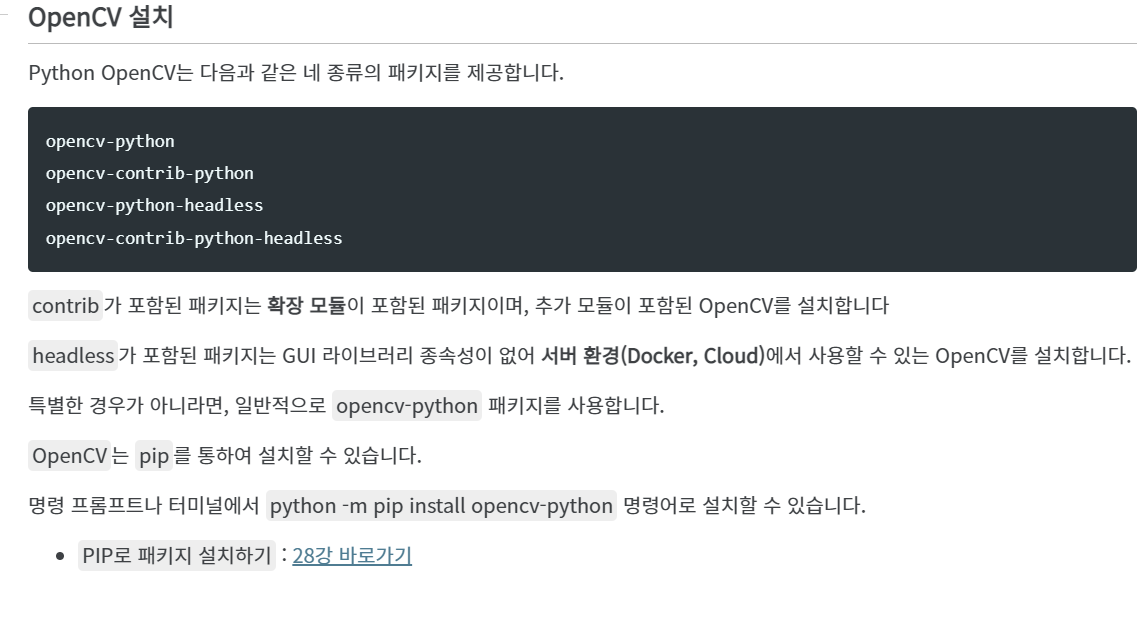

In [11]:
!pip install opencv-python

### Part2. openCV로 이미지 읽기

In [39]:
#########################
#### 컬러로 읽기
###############################
import cv2

img_color = cv2.imread('sample.jpg',cv2.IMREAD_COLOR)  # img_color = cv2.imread('test.jpg',1)
print(img_color[0], np.shape(img_color))
cv2.imshow('color image',img_color)   #'이미지캡션', 이미지 파일명
cv2.waitKey(0)   # 별도의 창에서 뜨기 때문에 종료키가 들어올때까지 잠시 대기

[[255 146 128]
 [255 146 128]
 [255 146 128]
 ...
 [255 146 128]
 [255 146 128]
 [255 146 128]] (512, 1024, 3)


-1

In [42]:
#########################
#### 그레이스케일로 읽기
###############################

import cv2
img_grayscale = cv2.imread('sample.jpg',cv2.IMREAD_GRAYSCALE)  # img_grayscale = cv2.imread('test.jpg',0)

print(img_grayscale[0], np.shape(img_grayscale))

cv2.imshow('grayscale image',img_grayscale)
cv2.waitKey(0) 


[153 153 153 ... 153 153 153] (512, 1024)


-1

In [4]:
########################
#### 알파채널까지 읽기 , IMREAD_COLOR로 이
###############################

import cv2
import numpy as np
img_unchanged = cv2.imread('png.png',cv2.IMREAD_UNCHANGED)  # img_unchanged = cv2.imread('test.jpg',-1)

print(img_unchanged[0][0], np.shape(img_unchanged))

cv2.imshow('grayscale image',img_unchanged)
cv2.waitKey(0) 

[255 255 255] (720, 720, 3)


-1

### Part3. OpenCV로 읽은 BGR 자료 ->  RGB로 변환
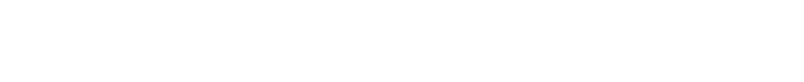 
- 오픈CV로 읽으면 배열로 읽힘.
- rgb가 아닌 bgr로 읽음


In [1]:
########################
#### 단 openCV는 rgb가 아닌 bgr로 읽음
#### 대강 읽기바람: https://blog.xcoda.net/102
####################

import cv2

img_color = cv2.imread('sample.jpg',cv2.IMREAD_COLOR)  # img_color = cv2.imread('test.jpg',1)

type(img_color), img_color[0]

(numpy.ndarray,
 array([[255, 146, 128],
        [255, 146, 128],
        [255, 146, 128],
        ...,
        [255, 146, 128],
        [255, 146, 128],
        [255, 146, 128]], dtype=uint8))

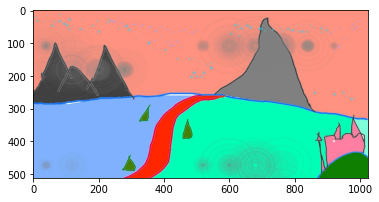

In [2]:
########################
#### cv2로 읽을때와 달리,plt에서 확인하면 rgb가 아닌 bgr로 나옴
####################

import matplotlib.pyplot as plt
plt.imshow(img_color)

(512, 1024, 3)
[[128 146 255]
 [128 146 255]
 [128 146 255]
 ...
 [128 146 255]
 [128 146 255]
 [128 146 255]]


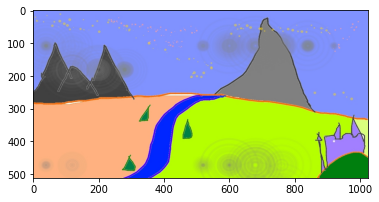

In [4]:
########################
#### cv2로 읽을때와 달리,plt에서 확인하면 rgb가 아닌 bgr로 나옴
####################
import numpy as np
print(np.shape(img_color))
tmp=np.zeros((512,1024,3))
tmp[:,:,0]=img_color[:,:,2]
tmp[:,:,1]=img_color[:,:,1]
tmp[:,:,2]=img_color[:,:,0]

tmp=tmp.astype('uint8')
print(tmp[0])
plt.imshow(tmp)

[[128 146 255]
 [128 146 255]
 [128 146 255]
 ...
 [128 146 255]
 [128 146 255]
 [128 146 255]]


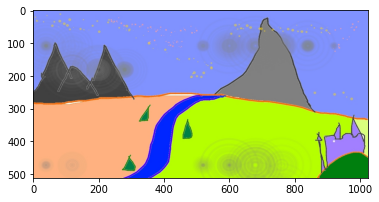

In [5]:
########################
#### 하지만 사용자가 일일이 rgb로 변경할 필요가 없음.
####################
img_color = cv2.imread('sample.jpg',cv2.IMREAD_COLOR)
img_color=cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)

print(img_color[0])
plt.imshow(img_color)

### Part4. 이미지의 일정 영역에 네모박스 그리기

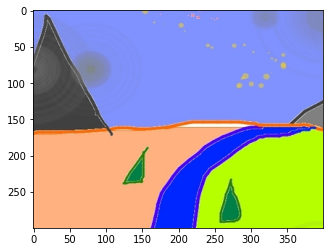

In [27]:
img_color = cv2.imread('sample.jpg',cv2.IMREAD_COLOR)
img_color=cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
tmp=img_color[100:400,200:600]
plt.imshow(tmp)

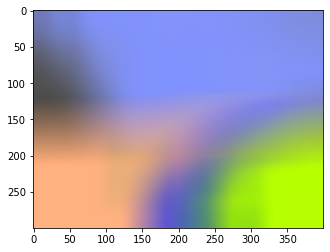

In [13]:
#################################################
####  이미지의 일정영역을 뿌옇게 변하게 하는 블러효과를 넣음
#### https://076923.github.io/posts/Python-opencv-13/
##################################################
dst = cv2.blur(tmp, (90, 90), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)
plt.imshow(dst)

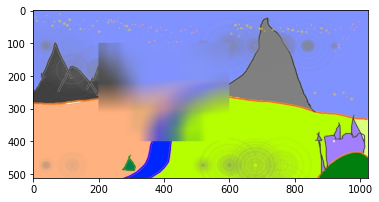

In [14]:
#################################################
####  블러효과 자료를 원래 이미지에 넣음
##################################################
dst = cv2.blur(tmp, (90, 90), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)
plt.imshow(dst)

img_color[100:400,200:600]=dst
plt.imshow(img_color)

### Part5. 다른 이미지 자료 합성하기

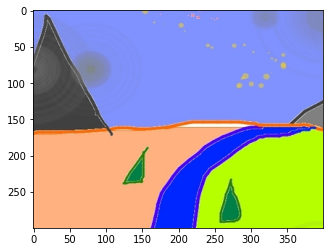

In [42]:
img_color = cv2.imread('sample.jpg',cv2.IMREAD_COLOR)
img_color=cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
tmp1=img_color[100:400,200:600]

plt.imshow(tmp1)

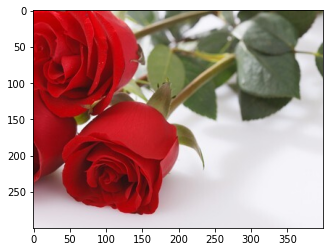

In [57]:
img_color2 = cv2.imread('flower.jpg',cv2.IMREAD_COLOR)
img_color2=cv2.cvtColor(img_color2,cv2.COLOR_BGR2RGB)
tmp2=img_color2[100:400,200:600]

plt.imshow(tmp2)

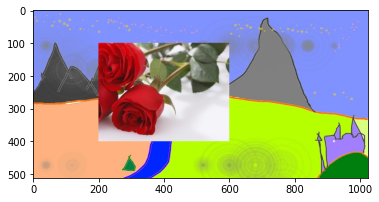

In [35]:
tmp1=tmp2
img_color[100:400,200:600]=tmp1
plt.imshow(img_color)

### Part6. 박스그리기

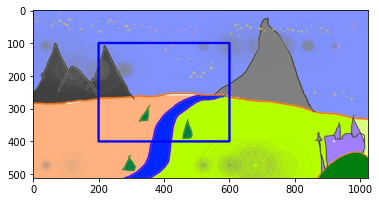

In [5]:
import cv2
import matplotlib.pyplot as plt

img_color1 = cv2.imread('sample.jpg',cv2.IMREAD_COLOR)
img_color1=cv2.cvtColor(img_color1,cv2.COLOR_BGR2RGB)
tmp1=img_color1[100:400,200:600]

rectengle=cv2.rectangle(img_color1,(200,100),(600,400),(0,0,255),5)
plt.imshow(rectengle)

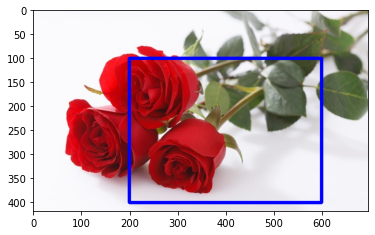

In [6]:
img_color2 = cv2.imread('flower.jpg',cv2.IMREAD_COLOR)
img_color2=cv2.cvtColor(img_color2,cv2.COLOR_BGR2RGB)
tmp2=img_color2[100:400,200:600]

rectengle=cv2.rectangle(img_color2,(200,100),(600,400),(0,0,255),5)
plt.imshow(rectengle)